In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [46]:
import tensorflow as tf


In [47]:
mnist = tf.keras.datasets.mnist

In [48]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [49]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

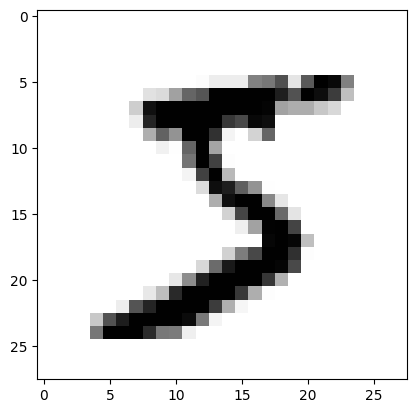

In [50]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [51]:
print(y_train[0])

5


In [52]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

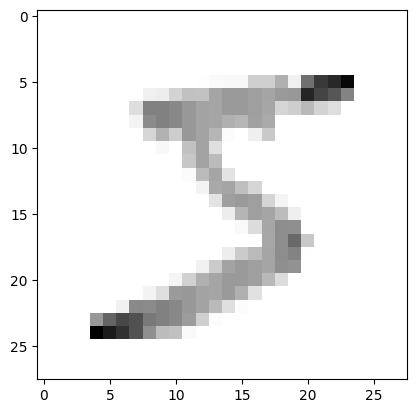

In [68]:
print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [69]:
model =tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [70]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [71]:
model.fit(x_train,  y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2630 - accuracy: 0.9242
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1038 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0706 - accuracy: 0.9782


In [72]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0932 - accuracy: 0.9725
0.0932198017835617
0.9725000262260437


We can save our model so as to use for our predictions


In [73]:
model.save('NumCC.model')

INFO:tensorflow:Assets written to: NumCC.model\assets


In [74]:
new_model = tf.keras.models.load_model('NumCC.model')

We can now make prediction base on the saved model

In [75]:
predictions = new_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [76]:
print(predictions)

[[4.2381632e-08 1.2206010e-07 1.8884315e-05 ... 9.9994308e-01
  6.2872630e-08 5.2526739e-06]
 [2.5629581e-07 2.3222089e-02 9.6707052e-01 ... 3.7393860e-08
  5.7571600e-07 3.7655330e-11]
 [1.8901241e-07 9.9991399e-01 2.8870334e-05 ... 3.1530279e-05
  8.9074874e-06 3.7256626e-07]
 ...
 [5.6876579e-09 4.4501562e-07 5.2911315e-07 ... 8.8396955e-06
  5.9659069e-06 1.5082177e-04]
 [1.1453847e-05 1.6356378e-06 1.7453557e-07 ... 3.0873139e-07
  3.2360468e-04 3.0086377e-07]
 [3.7564820e-07 5.8132642e-08 5.6992707e-08 ... 5.8817014e-11
  2.9964630e-07 2.9247130e-10]]


In [79]:
print(np.argmax(predictions[5]))

1


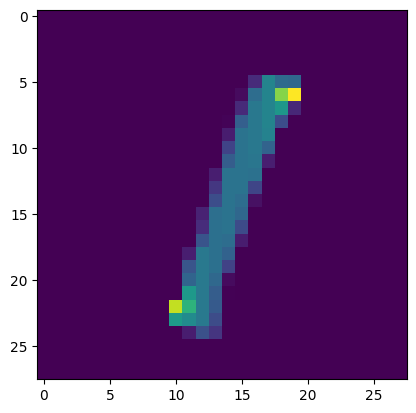

In [80]:
plt.imshow(x_test[5])
plt.show()